<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Project_2_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load data and include training split

# Load Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load pizza dataset

In [ ]:
from sklearn.datasets import load_wine
dataset = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_edited.csv")
print(dataset.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0      yes_es       yes_ec           no_em  
1      yes_es       yes_ec           no_em  
2      yes_es       yes_ec          yes_em  
3      yes_es        no_ec          yes_em  
4      yes_es        no_ec          yes_em  


# Create dummy variables

In [ ]:
columns = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
dataset = pd.concat([dataset]+[pd.get_dummies(dataset[i],drop_first=True) for i in columns],axis=1)
dataset.drop(columns,axis=1,inplace=True)
dataset.head(3)

,company,price_cad,diameter_in,black_pepper,chicken,meat,mozzarella,mushrooms,onion,pepperoni,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes_es,yes_ec,yes_em
0,A,29,22.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,A,25,20.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,A,19,16.0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


# Split dataset into training and testing

In [ ]:
#predicting the company name based on certain features
y = dataset['company']
print(y)

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [ ]:
#dropped the features that are probably not relevant to the model
X = dataset.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in  black_pepper  chicken   meat  mozzarella  \
0           29         22.0         False     True  False       False   
1           25         20.0         False    False  False       False   
2           19         16.0         False    False  False       False   
3           22         14.0         False    False  False       False   
4           30         18.0         False    False  False        True   
..         ...          ...           ...      ...    ...         ...   
124         11          8.5         False    False  False       False   
125         14         12.0         False    False  False       False   
126         17         14.0         False    False  False       False   
127         12          8.5         False    False   True       False   
128         15         12.0         False    False   True       False   

     mushrooms  onion  pepperoni  sausage  ...  super_supreme  thai_veggie  \
0        False  False      False    False  ..

In [ ]:
#do testing/training split - need different code for own data b/c no .data or .target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Examine target attribute - company - as this is a categorical variable, I chose to visualize it with a bar plot.

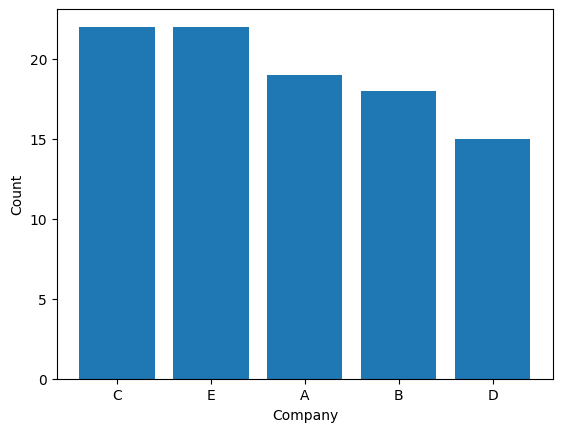

In [79]:
plt.bar(y_train.value_counts().index, y_train.value_counts())
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()

# **K-Nearest Neighbor**

In [ ]:
#import KNN clasifier and fit to training data
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.33


In [ ]:
# generate list of predictions for y2_test
y_pred = knn.predict(X_test)

In [ ]:
# generate a confusion matrix on pizza data - shows where model might be making mistakes
# model failing in the confusion b/w class 2 & class 3
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 5, 0],
       [0, 1, 0, 0, 5],
       [0, 0, 7, 0, 1],
       [3, 2, 0, 0, 0],
       [0, 4, 2, 0, 2]])

In [ ]:
# calculate class-wise precision score on pizza data
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.25      , 0.14285714, 0.77777778, 0.        , 0.25      ])

In [ ]:
# calculate class-wise recall score on iris data
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.16666667, 0.16666667, 0.875     , 0.        , 0.25      ])

In [ ]:
# calculate overall and class-wise F1-score on iris data
from sklearn.metrics import f1_score

# Calculate metrics globally by counting the total true positives, false negatives and false positives.
print("F1 score of micro")
print(f1_score(y_test, y_pred, average='micro'))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print("F1 score of macro")
print(f1_score(y_test, y_pred, average='macro'))
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
print("F1 score of weighted")
print(f1_score(y_test, y_pred, average='weighted'))

# Class-wise, no averaging
print('F1 score per class')
print(f1_score(y_test, y_pred, average=None))

F1 score of micro
0.3333333333333333
F1 score of macro
0.28547511312217194
F1 score of weighted
0.3245852187028658
F1 score per class
[0.2        0.15384615 0.82352941 0.         0.25      ]


In [ ]:
# calculate AUC score (ROC implementation in scikit-learn only works for binary classification) on iris data
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')

0.5626428571428571

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#best performing k (on training set) - not working
knn_gscv.best_params_

{'n_neighbors': 8}

In [ ]:
# @title Default title text
#accuracy of best performing k

# best k (8) performs at 0.49)
knn_gscv.best_score_

0.4905263157894737

# **Cross Validation Results**

In [ ]:
#cross validation results - 8 & 9th k are tied for best and 23rd k is worst performing
knn_gscv.cv_results_

{'mean_fit_time': array([0.00678263, 0.00469189, 0.00451684, 0.00518894, 0.00388341,
        0.00632277, 0.00483165, 0.00513968, 0.0040607 , 0.00382605,
        0.00462365, 0.00435343, 0.00388765, 0.00561719, 0.00397892,
        0.00434647, 0.00382032, 0.00373988, 0.00360899, 0.00361662,
        0.00465446, 0.00454116, 0.00425692, 0.00556192]),
 'std_fit_time': array([2.51476110e-03, 6.97940790e-04, 7.53428785e-04, 2.54298862e-03,
        3.36514979e-04, 4.53461709e-03, 2.36116524e-03, 2.24379397e-03,
        7.81667831e-04, 3.95169185e-04, 1.21154058e-03, 5.87662142e-04,
        1.75287895e-04, 3.20431015e-03, 4.78549871e-04, 1.33637068e-03,
        5.45943888e-04, 3.76389513e-04, 9.55701581e-05, 1.56778329e-04,
        9.87297680e-04, 7.11987786e-04, 4.26321365e-04, 2.45662224e-03]),
 'mean_score_time': array([0.01083508, 0.01110625, 0.00686316, 0.0067904 , 0.00605202,
        0.04364481, 0.00704975, 0.00789113, 0.0061739 , 0.00606265,
        0.00813336, 0.0069838 , 0.00621128, 0.00

# **Best Performing k - adjusted paramter**
While the default best performing k is 9 with a score of 0.48, I adjusted the parameter

In [92]:
# accuracy of k = 4 on testing data
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)
print("knn score: {}".format(knn4.score(X_test, y_test)))

knn score: 0.42424242424242425


# **Worst Performing k - adjusted parameter**
While the worst performing k is 23 with a score of 0.30, I adjusted the parameter

In [85]:
# accuracy of k = 1 on testing data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
print("knn score: {}".format(knn1.score(X_test, y_test)))

knn score: 0.3333333333333333


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#try increasing max_iter
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

# **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV


#dictionary of all values of c
param_grid = {"C": [0.001,0.1, 1, 10]}

#grid search on all values of k in dictionary for logist regression
logreg_gscv = GridSearchCV(logreg, param_grid, cv=5)
logreg_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.1, 1, 10]})

In [ ]:
#best performing c (on training set)
logreg_gscv.best_params_

{'C': 0.1}

In [ ]:
#accuracy of best performing c
logreg_gscv.best_score_

0.5105263157894736

In [ ]:
#cross validation results
logreg_gscv.cv_results_

{'mean_fit_time': array([0.0145545 , 0.05943651, 0.10720825, 0.2350141 ]),
 'std_fit_time': array([0.00145581, 0.0216952 , 0.02038076, 0.01726737]),
 'mean_score_time': array([0.00294714, 0.00335584, 0.00410638, 0.00317941]),
 'std_score_time': array([0.00013658, 0.00035243, 0.00105528, 0.00042748]),
 'param_C': masked_array(data=[0.001, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.25, 0.5 , 0.45, 0.45]),
 'split1_test_score': array([0.31578947, 0.42105263, 0.31578947, 0.36842105]),
 'split2_test_score': array([0.36842105, 0.52631579, 0.68421053, 0.42105263]),
 'split3_test_score': array([0.42105263, 0.57894737, 0.52631579, 0.52631579]),
 'split4_test_score': array([0.42105263, 0.52631579, 0.52631579, 0.52631579]),
 'mean_test_score': array([0.35526316, 0.51052632, 0.50052632, 0.45842105]),
 'std_test_score': array([0.06552579, 

# Random Forest

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

#fit on training/testing
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)



RandomForestClassifier(n_estimators=5, random_state=2)

## Testing/Training Split Evaluation

In [ ]:
# Accuracy
#report accuracy
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.812
Accuracy on test set: 0.455


***It looks like this method presents a model that is significantly more accurate on the training set than the test set. The low accuracy on the test set infers that it might not generalize to new data well.  ***

In [ ]:
# Classification Report
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# Get the unique class labels from your y_test data
unique_classes = y_test.unique()

# Generate target names dynamically
target_names = [f"class {i+1}" for i in range(len(unique_classes))]

print(classification_report(y_test, forest.predict(X_test),
                            target_names=target_names)) # Use dynamically generated target names

Accuracy on training set: 0.812
Accuracy on test set: 0.455
              precision    recall  f1-score   support

     class 1       0.75      0.50      0.60         6
     class 2       0.20      0.17      0.18         6
     class 3       0.58      0.88      0.70         8
     class 4       0.33      0.40      0.36         5
     class 5       0.33      0.25      0.29         8

    accuracy                           0.45        33
   macro avg       0.44      0.44      0.43        33
weighted avg       0.45      0.45      0.44        33



## Cross Validation

Below seems to be a repeated code for the class validation (notebook 5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# for n_neighbors in neighbors_settings:
#     # build the model
#     knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
#     knn.fit(X_train, y_train)
#     # record training set accuracy
#     training_accuracy.append(knn.score(X_train, y_train))
#     # record generalization accuracy
#     test_accuracy.append(knn.score(X_test, y_test))


knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores_all = cross_val_score(knn_cv, X, y, cv=5) #pass classifier, dataset, target, and # folds

#return scores for each fold
print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all))) #calculate the mean


cv_scores:
[0.53846154 0.53846154 0.5        0.34615385 0.4       ]
cv_scores mean:
0.46461538461538454


## Feature Importances

In [ ]:
# print list of feature importances
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.04880814 0.08395576 0.00256678 0.06379841 0.02167242 0.03803952
 0.01167015 0.         0.00402906 0.00955731 0.05719902 0.00479132
 0.06300022 0.0049805  0.02106427 0.02218526 0.03712895 0.00393402
 0.01175363 0.02275885 0.01430966 0.00978082 0.         0.00522391
 0.00671285 0.01704558 0.00349367 0.01865363 0.00886566 0.00850114
 0.01340177 0.         0.04618016 0.02651671 0.01532238 0.06627498
 0.0126469  0.05846174 0.03305613 0.10265873]


Below class code does not work - said y_names was noto defined

In [ ]:
# # plot feature importances
# def plot_feature_importances(model):
#     n_features = X.shape[1]
#     plt.barh(np.arange(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), y_names)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.ylim(-1, n_features)

# plot_feature_importances(forest)

### Had to use Gemini suggestion to get this working
### - it looks very messy because of the numerous features. It looks like extra mushrooms column (yes_em) and diameter in inches (diameter_in) are the most important features.

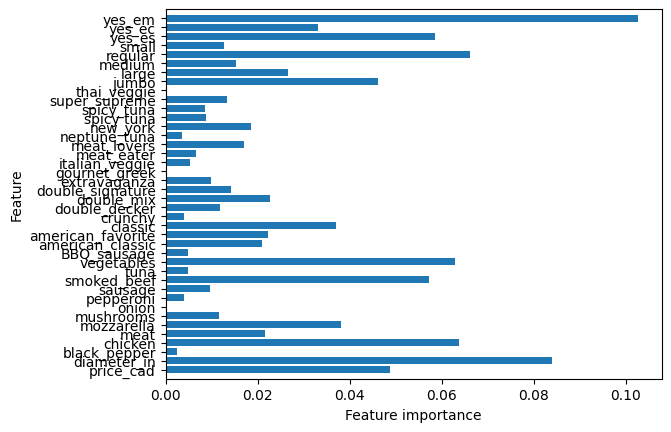

In [ ]:
# plot feature importances
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    # Define y_names here, assuming 'X' has column names you want to use
    y_names = X.columns
    plt.yticks(np.arange(n_features), y_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

## Random Forest - adjusted parameter - tripled the original estimator of 5

In [94]:
#fit on training/testing
forest = RandomForestClassifier(n_estimators=15, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=2)

In [95]:
# Accuracy - small increase for training set accuracy, but no change to test set accuracy
#report accuracy
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.455


In [96]:
# Classification Report
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# Get the unique class labels from your y_test data
unique_classes = y_test.unique()

# Generate target names dynamically
target_names = [f"class {i+1}" for i in range(len(unique_classes))]

print(classification_report(y_test, forest.predict(X_test),
                            target_names=target_names)) # Use dynamically generated target names

Accuracy on training set: 0.844
Accuracy on test set: 0.455
              precision    recall  f1-score   support

     class 1       0.67      0.67      0.67         6
     class 2       0.22      0.33      0.27         6
     class 3       0.78      0.88      0.82         8
     class 4       0.33      0.20      0.25         5
     class 5       0.17      0.12      0.14         8

    accuracy                           0.45        33
   macro avg       0.43      0.44      0.43        33
weighted avg       0.44      0.45      0.44        33



In [97]:
# print list of feature importances
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.06847589 0.05976391 0.00911849 0.04447287 0.02932914 0.03560816
 0.02712643 0.         0.00134302 0.01064279 0.04898863 0.01683296
 0.05130787 0.00846241 0.01215083 0.01742342 0.03800052 0.00711573
 0.00899105 0.01823591 0.01113549 0.0051895  0.         0.0027707
 0.00256331 0.01836712 0.00194624 0.01417916 0.0108608  0.00653323
 0.01112954 0.00108108 0.03834484 0.03728266 0.01660093 0.09891386
 0.01448111 0.03379093 0.0399179  0.12152157]


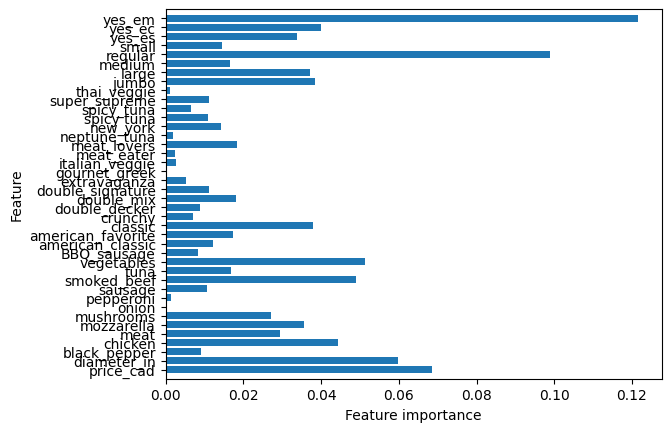

In [98]:
##UNLIKE THE DEFAULT RANDOM FOREST, IT SEEMS LIKE YES EXTRA MUSHROOMS AND REGULAR ARE THE MOST IMPORTANT FEATURES.

# plot feature importances
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    # Define y_names here, assuming 'X' has column names you want to use
    y_names = X.columns
    plt.yticks(np.arange(n_features), y_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

## Random Forest - Adjusted Parameter - increased estimators to 20

In [ ]:
#fit on training/testing
forest = RandomForestClassifier(n_estimators=20, random_state=6)
forest.fit(X_train, y_train)

In [ ]:
# Accuracy
#report accuracy
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
# Classification Report
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# Get the unique class labels from your y_test data
unique_classes = y_test.unique()

# Generate target names dynamically
target_names = [f"class {i+1}" for i in range(len(unique_classes))]

print(classification_report(y_test, forest.predict(X_test),
                            target_names=target_names)) # Use dynamically generated target names

In [ ]:
# print list of feature importances
print("Feature importances:")
print(forest.feature_importances_)

In [ ]:
# plot feature importances
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    # Define y_names here, assuming 'X' has column names you want to use
    y_names = X.columns
    plt.yticks(np.arange(n_features), y_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

**Had to use Gemini suggestion because the original code produces value error b/c mismatched classes**

# **Feature Scaling - this did not work**

## **Scale the features**

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0) - #CODE DOESN'T RUN - ERROR HERE

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

SyntaxError: invalid syntax (<ipython-input-1-ff281add34e2>, line 5)

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train  min_on_training).max(axis=0) - #CODE DOESN'T RUN - ERROR HERE

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

SyntaxError: invalid syntax (<ipython-input-28-9de5c3dc8550>, line 5)